In [ ]:
output_dir = "./reproduced_results"

# Code 1: Data Loading and Domain Score Computation

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load data
data = pd.read_csv('data_processed.csv', index_col=0)

In [4]:
data

,Lang_agent,Round,SC1,SC2,SC3,SC4,SC5,SC6,SC7,SC8,...,BIMI14,BIMI15,BIMI16,BIMI17,BIMI18,BIMI19,BIMI20,right.left,cons.prog,religion
0,<SQ0LruF>,1,2,2,2,3,2,3,1,0,...,1,1,7,1,7,7,1,7,5,3
1,<SQ0LruF>,2,2,2,2,2,2,1,1,0,...,1,1,7,1,7,7,1,7,5,3
2,<yLvzAov>,1,2,2,2,2,2,1,1,0,...,2,2,6,6,6,6,2,5,2,4
3,<yLvzAov>,2,2,2,2,2,1,2,1,0,...,1,3,3,2,5,4,3,5,2,4
4,<aZVmWg7>,1,3,2,1,3,2,2,1,0,...,4,4,5,4,6,5,3,6,3,2
5,<aZVmWg7>,2,3,2,2,3,2,1,2,0,...,4,5,3,2,6,5,3,4,3,2
6,<xWY2na4>,1,0,0,0,0,0,0,0,0,...,1,1,7,7,7,7,1,3,2,1
7,<xWY2na4>,2,1,1,2,1,2,0,2,1,...,2,3,2,5,6,5,2,6,3,3
8,<23R1qYZ>,1,0,3,0,0,0,0,0,3,...,0,1,7,7,7,7,0,5,3,2
9,<23R1qYZ>,2,2,3,2,0,2,0,1,0,...,1,2,1,1,6,7,1,5,3,6


In [5]:
human_data = pd.read_csv('human_data.csv')

In [6]:
human_data

,Instrument_Domain,Mean,Standard Deviation
0,SCS-R_Private Self-consciousness,16.40,4.75
1,SCS-R_Public Self-consciousness,13.85,4.45
2,SCS-R_Social Anxiety,8.70,4.50
3,BIMI_Agentic Management,3.41,0.86
4,BIMI_Communal Management,3.50,1.06
5,BFI-2_Negative Emotionality,3.07,0.87
6,BFI-2_Extraversion,3.23,0.80
7,BFI-2_Agreeableness,3.68,0.64
8,BFI-2_Conscientiousness,3.43,0.77
9,BFI-2_Open-mindedness,3.92,0.65


In [7]:
# Define domains based on variables_explanation.docx
domains = {
    'SCS-R': {
        'Private Self-consciousness': ['SC1', 'SC4', 'SC6', 'SC8', 'SC12', 'SC14', 'SC17', 'SC19', 'SC21'],
        'Public Self-consciousness': ['SC2', 'SC5', 'SC10', 'SC13', 'SC16', 'SC18', 'SC20'],
        'Social Anxiety': ['SC3', 'SC7', 'SC9', 'SC11', 'SC15', 'SC22']
    },
    'BIMI': {
        'Agentic Management': [f'BIMI{i}' for i in range(1, 11)],
        'Communal Management': [f'BIMI{i}' for i in range(11, 21)]
    },
    'BFI-2': {
        'Negative Emotionality': [f'BFI{i}' for i in [2,7,12,17,22,27,32,37,42,47,52,57]],
        'Extraversion': [f'BFI{i}' for i in [5,10,15,20,25,30,35,40,45,50,55,60]],
        'Agreeableness': [f'BFI{i}' for i in [4,9,14,19,24,29,34,39,44,49,54,59]],
        'Conscientiousness': [f'BFI{i}' for i in [3,8,13,18,23,28,33,38,43,48,53,58]],
        'Open-mindedness': [f'BFI{i}' for i in [1,6,11,16,21,26,31,36,41,46,51,56]]
    },
    'HEXACO-100': {
        'Honesty_humility': [f'H{i}' for i in [6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,96]],
        'Emotionality': [f'H{i}' for i in [5,11,17,23,29,35,41,47,53,59,65,71,77,83,89,95]],
        'Extraversion': [f'H{i}' for i in [4,10,16,22,28,34,40,46,52,58,64,70,76,82,88,94]],
        'Agreeableness': [f'H{i}' for i in [3,9,15,21,27,33,39,45,51,57,63,69,75,81,87,93]],
        'Conscientiousness': [f'H{i}' for i in [2,8,14,20,26,32,38,44,50,56,62,68,74,80,86,92]],
        'Openness to Experience': [f'H{i}' for i in [1,7,13,19,25,31,37,43,49,55,61,67,73,79,85,91]],
        'Altruism': [f'H{i}' for i in [97,98,99,100]]
    },
    'SD3': {
        'Machiavellianism': [f'SD{i}' for i in range(1,10)],
        'Narcissism': [f'SD{i}' for i in range(10,19)],
        'Psychopathy': [f'SD{i}' for i in range(19,28)]
    },
    'Political': {
        'Conservative Orientation': ['right.left', 'cons.prog', 'religion']  # Average for overall
    }
}

In [8]:
# Compute domain scores
domain_scores = []
for idx, row in data.iterrows():
    agent = row['Lang_agent']
    round_num = row['Round']
    scores = {'Lang_agent': agent, 'Round': round_num}
    for instr, doms in domains.items():
        for dom, cols in doms.items():
            if instr == 'SCS-R':
                scores[f'{instr}_{dom}'] = row[cols].sum()
            else:
                scores[f'{instr}_{dom}'] = row[cols].mean()
    domain_scores.append(scores)
domain_df = pd.DataFrame(domain_scores)

In [9]:
domain_df

,Lang_agent,Round,SCS-R_Private Self-consciousness,SCS-R_Public Self-consciousness,SCS-R_Social Anxiety,BIMI_Agentic Management,BIMI_Communal Management,BFI-2_Negative Emotionality,BFI-2_Extraversion,BFI-2_Agreeableness,...,HEXACO-100_Emotionality,HEXACO-100_Extraversion,HEXACO-100_Agreeableness,HEXACO-100_Conscientiousness,HEXACO-100_Openness to Experience,HEXACO-100_Altruism,SD3_Machiavellianism,SD3_Narcissism,SD3_Psychopathy,Political_Conservative Orientation
0,<SQ0LruF>,1,23,14,6,3.4,4.0,2.333333,3.583333,4.333333,...,3.1875,3.8750,4.5000,4.1250,3.6875,4.75,2.555556,3.333333,2.888889,5.000000
1,<SQ0LruF>,2,15,14,7,3.1,4.0,2.833333,3.333333,4.250000,...,2.8750,3.9375,4.4375,4.6250,4.0000,4.75,2.777778,3.222222,2.777778,5.000000
2,<yLvzAov>,1,16,14,11,4.0,4.1,3.083333,3.666667,3.666667,...,3.1250,3.6250,3.3750,4.0000,3.8750,5.00,3.555556,3.444444,2.777778,3.666667
3,<yLvzAov>,2,16,13,11,4.1,3.1,2.833333,3.583333,3.666667,...,3.1250,3.3750,3.3125,3.0625,4.0000,4.50,3.111111,2.888889,2.666667,3.666667
4,<aZVmWg7>,1,23,14,9,4.4,4.5,2.750000,3.666667,4.166667,...,3.4375,3.8750,3.9375,4.1875,4.5000,5.00,1.777778,2.888889,1.222222,3.666667
5,<aZVmWg7>,2,20,17,10,4.5,4.3,3.333333,3.666667,4.416667,...,3.1875,3.6875,3.4375,4.2500,4.3125,4.75,2.777778,3.444444,1.666667,3.000000
6,<xWY2na4>,1,3,0,3,3.4,4.0,2.333333,3.333333,3.333333,...,1.7500,3.3750,4.2500,4.1250,3.0000,5.00,2.333333,1.666667,1.000000,2.000000
7,<xWY2na4>,2,11,13,12,4.1,3.6,2.333333,3.166667,3.833333,...,3.3125,3.7500,3.8750,4.0625,3.5625,4.75,2.000000,2.444444,1.111111,4.000000
8,<23R1qYZ>,1,11,3,1,2.5,3.6,2.500000,2.916667,4.333333,...,2.3750,2.3750,4.7500,4.6250,3.0625,4.50,2.444444,2.333333,1.000000,3.333333
9,<23R1qYZ>,2,11,17,8,3.5,2.9,2.916667,2.583333,4.000000,...,3.0625,3.4375,3.6875,3.9375,3.5000,4.50,2.444444,2.666667,2.000000,4.666667


In [10]:
# Save for later
domain_df.to_csv(f'{output_dir}domain_scores.csv', index=False)
# print(domain_df.head())

In [11]:
# Re-organize according to domain
agent_dict = {
    "Domain": [],
    "Round": [],
    "<SQ0LruF>": [],
    "<yLvzAov>": [],
    "<aZVmWg7>": [],
    "<xWY2na4>": [],
    "<23R1qYZ>": [],
    "<bbK3vKO>": [],
    "<2qYGe5m>": [],
}

In [12]:
agent_raw_dict = {}

In [13]:
for x_index in range(domain_df.shape[0]):

    if x_index % 2 == 0:
        round = 1
    else:
        round = 2

    if x_index // 2 == 0:
        lang_agent = "<SQ0LruF>"
    elif x_index // 2 == 1:
        lang_agent = "<yLvzAov>"
    elif x_index // 2 == 2:
        lang_agent = "<aZVmWg7>"
    elif x_index // 2 == 3:
        lang_agent = "<xWY2na4>"
    elif x_index // 2 == 4:
        lang_agent = "<23R1qYZ>"
    elif x_index // 2 == 5:
        lang_agent = "<bbK3vKO>"
    elif x_index // 2 == 6:
        lang_agent = "<2qYGe5m>"

    for domain in domain_df.drop(['Lang_agent', 'Round'], axis=1).columns:

        agent_raw_dict[(domain, round, lang_agent)] =  domain_df.loc[x_index, domain]

In [14]:
# agent_raw_dict

In [15]:
for domain in domain_df.drop(['Lang_agent', 'Round'], axis=1).columns:
    for round in [1,2]:
        agent_dict["Domain"].append(domain)
        agent_dict["Round"].append(round)
        for lang_agent in domain_df['Lang_agent'].unique():
            agent_dict[lang_agent].append(agent_raw_dict[(domain, round, lang_agent)])

In [16]:
agent_df = pd.DataFrame(agent_dict)

In [17]:
agent_df

,Domain,Round,<SQ0LruF>,<yLvzAov>,<aZVmWg7>,<xWY2na4>,<23R1qYZ>,<bbK3vKO>,<2qYGe5m>
0,SCS-R_Private Self-consciousness,1,23.000000,16.000000,23.000000,3.000000,11.000000,15.000000,9.000000
1,SCS-R_Private Self-consciousness,2,15.000000,16.000000,20.000000,11.000000,11.000000,20.000000,18.000000
2,SCS-R_Public Self-consciousness,1,14.000000,14.000000,14.000000,0.000000,3.000000,14.000000,0.000000
3,SCS-R_Public Self-consciousness,2,14.000000,13.000000,17.000000,13.000000,17.000000,16.000000,0.000000
4,SCS-R_Social Anxiety,1,6.000000,11.000000,9.000000,3.000000,1.000000,9.000000,3.000000
5,SCS-R_Social Anxiety,2,7.000000,11.000000,10.000000,12.000000,8.000000,12.000000,3.000000
6,BIMI_Agentic Management,1,3.400000,4.000000,4.400000,3.400000,2.500000,4.600000,4.000000
7,BIMI_Agentic Management,2,3.100000,4.100000,4.500000,4.100000,3.500000,4.600000,3.400000
8,BIMI_Communal Management,1,4.000000,4.100000,4.500000,4.000000,3.600000,5.200000,4.600000
9,BIMI_Communal Management,2,4.000000,3.100000,4.300000,3.600000,2.900000,5.300000,3.600000


# Code 2: Descriptive Stats and Comparison to Humans

In [18]:
from scipy import stats
import pingouin as pg

In [19]:
# Map human means/SDs
human_means = dict(zip(human_data['Instrument_Domain'], human_data['Mean']))
human_sds = dict(zip(human_data['Instrument_Domain'], human_data['Standard Deviation']))

In [20]:
human_means

{'SCS-R_Private Self-consciousness': 16.4,
 'SCS-R_Public Self-consciousness': 13.85,
 'SCS-R_Social Anxiety': 8.7,
 'BIMI_Agentic Management': 3.41,
 'BIMI_Communal Management': 3.5,
 'BFI-2_Negative Emotionality': 3.07,
 'BFI-2_Extraversion': 3.23,
 'BFI-2_Agreeableness': 3.68,
 'BFI-2_Conscientiousness': 3.43,
 'BFI-2_Open-mindedness': 3.92,
 'HEXACO-100_Honesty_humility': 3.3,
 'HEXACO-100_Emotionality': 3.12,
 'HEXACO-100_Extraversion': 3.22,
 'HEXACO-100_Agreeableness': 2.78,
 'HEXACO-100_Conscientiousness': 3.52,
 'HEXACO-100_Openness to Experience': 3.69,
 'HEXACO-100_Altruism': 3.97,
 'SD3_Machiavellianism': 3.15,
 'SD3_Narcissism': 2.82,
 'SD3_Psychopathy': 2.18,
 'Political_Conservative Orientation': 4.89}

In [21]:
human_sds

{'SCS-R_Private Self-consciousness': 4.75,
 'SCS-R_Public Self-consciousness': 4.45,
 'SCS-R_Social Anxiety': 4.5,
 'BIMI_Agentic Management': 0.86,
 'BIMI_Communal Management': 1.06,
 'BFI-2_Negative Emotionality': 0.87,
 'BFI-2_Extraversion': 0.8,
 'BFI-2_Agreeableness': 0.64,
 'BFI-2_Conscientiousness': 0.77,
 'BFI-2_Open-mindedness': 0.65,
 'HEXACO-100_Honesty_humility': 0.74,
 'HEXACO-100_Emotionality': 0.63,
 'HEXACO-100_Extraversion': 0.64,
 'HEXACO-100_Agreeableness': 0.63,
 'HEXACO-100_Conscientiousness': 0.55,
 'HEXACO-100_Openness to Experience': 0.57,
 'HEXACO-100_Altruism': 0.74,
 'SD3_Machiavellianism': 0.57,
 'SD3_Narcissism': 0.53,
 'SD3_Psychopathy': 0.59,
 'Political_Conservative Orientation': 2.31}

In [22]:
# Aggregated agent means (average across rounds and agents)
agg_means = domain_df.drop(['Lang_agent', 'Round'], axis=1).mean()

In [23]:
agg_means

SCS-R_Private Self-consciousness      15.071429
SCS-R_Public Self-consciousness       10.642857
SCS-R_Social Anxiety                   7.500000
BIMI_Agentic Management                3.828571
BIMI_Communal Management               4.057143
BFI-2_Negative Emotionality            2.684524
BFI-2_Extraversion                     3.357143
BFI-2_Agreeableness                    4.083333
BFI-2_Conscientiousness                3.863095
BFI-2_Open-mindedness                  3.916667
HEXACO-100_Honesty_humility            4.339286
HEXACO-100_Emotionality                3.084821
HEXACO-100_Extraversion                3.767857
HEXACO-100_Agreeableness               3.977679
HEXACO-100_Conscientiousness           4.183036
HEXACO-100_Openness to Experience      3.964286
HEXACO-100_Altruism                    4.803571
SD3_Machiavellianism                   2.746032
SD3_Narcissism                         2.738095
SD3_Psychopathy                        1.801587
Political_Conservative Orientation     3

In [24]:
# Bootstrap CI example for one domain
def bootstrap_ci(data, n_boot=1000):
    boots = [np.mean(np.random.choice(data, len(data))) for _ in range(n_boot)]
    return np.percentile(boots, [2.5, 97.5]).round(2)

In [25]:
# T-tests and effect sizes
results = []
for col in agg_means.index:
    agent_data = domain_df[col].values
    human_mean = human_means.get(col, np.nan)
    if np.isnan(human_mean):
        continue
    t_stat, p_val = stats.ttest_1samp(agent_data, human_mean)
    std_agent = np.std(agent_data, ddof=1) if len(agent_data) > 1 else 0
    cohens_d = (np.mean(agent_data) - human_mean) / std_agent if std_agent != 0 else 0
    results.append({'Domain': col, 'Agent Mean': np.mean(agent_data), 'Human Mean': human_mean, 'Agent Bootstrap CI': tuple(bootstrap_ci(domain_df[col])), 't': t_stat, 'p': p_val, 'Cohen d': cohens_d})

In [26]:
# results

In [27]:
results_df = pd.DataFrame(results)

In [28]:
results_df

,Domain,Agent Mean,Human Mean,Agent Bootstrap CI,t,p,Cohen d
0,SCS-R_Private Self-consciousness,15.071429,16.40,"(12.29, 17.79)",-0.877788,3.959919e-01,-0.234599
1,SCS-R_Public Self-consciousness,10.642857,13.85,"(7.14, 13.71)",-1.804011,9.443977e-02,-0.482142
2,SCS-R_Social Anxiety,7.500000,8.70,"(5.57, 9.29)",-1.201652,2.509327e-01,-0.321155
3,BIMI_Agentic Management,3.828571,3.41,"(3.51, 4.14)",2.493487,2.691730e-02,0.666412
4,BIMI_Communal Management,4.057143,3.50,"(3.73, 4.42)",2.995912,1.031971e-02,0.800691
5,BFI-2_Negative Emotionality,2.684524,3.07,"(2.53, 2.84)",-4.596048,5.012872e-04,-1.228345
6,BFI-2_Extraversion,3.357143,3.23,"(3.18, 3.52)",1.438081,1.740466e-01,0.384343
7,BFI-2_Agreeableness,4.083333,3.68,"(3.89, 4.25)",4.549330,5.458094e-04,1.215860
8,BFI-2_Conscientiousness,3.863095,3.43,"(3.73, 4.01)",5.627746,8.231661e-05,1.504078
9,BFI-2_Open-mindedness,3.916667,3.92,"(3.75, 4.06)",-0.040909,9.679899e-01,-0.010933


In [29]:
results_df = pd.DataFrame(results)
results_df['p_adj'] = results_df['p'] * len(results_df)

In [30]:
results_df.round(2)

,Domain,Agent Mean,Human Mean,Agent Bootstrap CI,t,p,Cohen d,p_adj
0,SCS-R_Private Self-consciousness,15.07,16.40,"(12.29, 17.79)",-0.88,0.40,-0.23,8.32
1,SCS-R_Public Self-consciousness,10.64,13.85,"(7.14, 13.71)",-1.80,0.09,-0.48,1.98
2,SCS-R_Social Anxiety,7.50,8.70,"(5.57, 9.29)",-1.20,0.25,-0.32,5.27
3,BIMI_Agentic Management,3.83,3.41,"(3.51, 4.14)",2.49,0.03,0.67,0.57
4,BIMI_Communal Management,4.06,3.50,"(3.73, 4.42)",3.00,0.01,0.80,0.22
5,BFI-2_Negative Emotionality,2.68,3.07,"(2.53, 2.84)",-4.60,0.00,-1.23,0.01
6,BFI-2_Extraversion,3.36,3.23,"(3.18, 3.52)",1.44,0.17,0.38,3.65
7,BFI-2_Agreeableness,4.08,3.68,"(3.89, 4.25)",4.55,0.00,1.22,0.01
8,BFI-2_Conscientiousness,3.86,3.43,"(3.73, 4.01)",5.63,0.00,1.50,0.00
9,BFI-2_Open-mindedness,3.92,3.92,"(3.75, 4.06)",-0.04,0.97,-0.01,20.33


In [30]:
# Bootstrap CI example for one domain
# def bootstrap_ci(data, n_boot=1000):
#     boots = [np.mean(np.random.choice(data, len(data))) for _ in range(n_boot)]
#     return np.percentile(boots, [2.5, 97.5])

In [31]:
# print('Ex: Private SC CI:', bootstrap_ci(domain_df['SCS-R_Private Self-consciousness']))

Ex: Private SC CI: [12.13928571 17.78571429]


# Code 3: Test-Retest Reliability

In [32]:
agents = domain_df['Lang_agent'].unique()

agents

array(['<SQ0LruF>', '<yLvzAov>', '<aZVmWg7>', '<xWY2na4>', '<23R1qYZ>',
       '<bbK3vKO>', '<2qYGe5m>'], dtype=object)

In [33]:
# Per agent Pearson across domains
per_agent_corrs = {}
for agent in agents:
    df_agent = domain_df[domain_df['Lang_agent'] == agent]
    round1 = df_agent[df_agent['Round'] == 1].drop(['Lang_agent', 'Round'], axis=1).iloc[0]
    round2 = df_agent[df_agent['Round'] == 2].drop(['Lang_agent', 'Round'], axis=1).iloc[0]
    corr = stats.pearsonr(round1, round2)[0]
    per_agent_corrs[agent] = corr
print('Pearson r per agent:', per_agent_corrs)
print()
print('Avg Pearson r per agent:', np.mean(np.array(list(per_agent_corrs.values()))))

Pearson r per agent: {'<SQ0LruF>': 0.9577203043794814, '<yLvzAov>': 0.9946095265316344, '<aZVmWg7>': 0.9764383383339833, '<xWY2na4>': -0.19411994842638303, '<23R1qYZ>': 0.3379253267355887, '<bbK3vKO>': 0.9908365575704257, '<2qYGe5m>': 0.8366986803704406}

Avg Pearson r per agent: 0.7000155407850244


In [34]:
# Per domain Pearson across agents
round1_df = domain_df[domain_df['Round'] == 1].drop(['Lang_agent', 'Round'], axis=1)
round2_df = domain_df[domain_df['Round'] == 2].drop(['Lang_agent', 'Round'], axis=1)
per_domain_corrs = {}
for col in round1_df.columns:
    corr = stats.pearsonr(round1_df[col], round2_df[col])[0]
    per_domain_corrs[col] = corr
print('Pearson r per domain:', per_domain_corrs)
print()
print('Avg Pearson r per domain:', np.nanmean(np.array(list(per_domain_corrs.values()))))  # nanmean in case of nan

Pearson r per domain: {'SCS-R_Private Self-consciousness': 0.5463334724853446, 'SCS-R_Public Self-consciousness': 0.5303363345874663, 'SCS-R_Social Anxiety': 0.48524747941547286, 'BIMI_Agentic Management': 0.6563093477849229, 'BIMI_Communal Management': 0.8514275316223775, 'BFI-2_Negative Emotionality': 0.40401822079643257, 'BFI-2_Extraversion': 0.8660266351646656, 'BFI-2_Agreeableness': 0.7538851296330044, 'BFI-2_Conscientiousness': 0.2956556239042798, 'BFI-2_Open-mindedness': 0.526829519014703, 'HEXACO-100_Honesty_humility': 0.18195633571851272, 'HEXACO-100_Emotionality': -0.543639254969432, 'HEXACO-100_Extraversion': 0.7376110199842894, 'HEXACO-100_Agreeableness': 0.17921428759978045, 'HEXACO-100_Conscientiousness': 0.3775038127491114, 'HEXACO-100_Openness to Experience': 0.9627540273332105, 'HEXACO-100_Altruism': 0.2594372608313854, 'SD3_Machiavellianism': 0.6965182090227953, 'SD3_Narcissism': 0.6021083530190762, 'SD3_Psychopathy': 0.8112811374035319, 'Political_Conservative Orient

In [35]:
import pingouin as pg

In [36]:
# Per domain ICC across agents
ICCs_per_domain = {}

for domain in domain_df.drop(['Lang_agent', 'Round'], axis=1).columns:
    ICCs_per_domain[domain] = []
    icc_data = domain_df.loc[:, ["Lang_agent", "Round", domain]]
    # print(icc_data)
    icc = pg.intraclass_corr(icc_data, targets='Lang_agent', raters='Round', ratings=domain).set_index('Type').loc['ICC2k', 'ICC']
    ICCs_per_domain[domain] = icc

In [37]:
ICCs_per_domain

{'SCS-R_Private Self-consciousness': 0.6367713004484307,
 'SCS-R_Public Self-consciousness': 0.6198595787362084,
 'SCS-R_Social Anxiety': 0.5436893203883495,
 'BIMI_Agentic Management': 0.7941176470588234,
 'BIMI_Communal Management': 0.7889525794684736,
 'BFI-2_Negative Emotionality': 0.4781144781144784,
 'BFI-2_Extraversion': 0.9123076923076919,
 'BFI-2_Agreeableness': 0.845257903494176,
 'BFI-2_Conscientiousness': 0.4700460829493111,
 'BFI-2_Open-mindedness': 0.633802816901408,
 'HEXACO-100_Honesty_humility': 0.3372333103922917,
 'HEXACO-100_Emotionality': -1.2697266632284672,
 'HEXACO-100_Extraversion': 0.7918552036199097,
 'HEXACO-100_Agreeableness': 0.32474804031354965,
 'HEXACO-100_Conscientiousness': 0.5196042506412606,
 'HEXACO-100_Openness to Experience': 0.9238660907127431,
 'HEXACO-100_Altruism': 0.39999999999999936,
 'SD3_Machiavellianism': 0.7850678733031667,
 'SD3_Narcissism': 0.7555274794693618,
 'SD3_Psychopathy': 0.8931506849315068,
 'Political_Conservative Orientatio

In [38]:
print('Avg ICC per domain:', np.mean(np.array(list(ICCs_per_domain.values()))))

Avg ICC per domain: 0.540352550702834


In [39]:
# Per agent ICC across domains
ICCs_per_agent = {}

for agent in agent_df.drop(['Domain', 'Round'], axis=1).columns:
    ICCs_per_agent[agent] = []
    icc_data = agent_df.loc[:, ["Domain", "Round", agent]]
    # print(icc_data)
    icc = pg.intraclass_corr(icc_data, targets='Domain', raters='Round', ratings=agent).set_index('Type').loc['ICC2k', 'ICC']
    ICCs_per_agent[agent] = icc

In [40]:
ICCs_per_agent

{'<SQ0LruF>': 0.9499093191010822,
 '<yLvzAov>': 0.9963548212049159,
 '<aZVmWg7>': 0.9881484356699806,
 '<xWY2na4>': -0.23347232166640725,
 '<23R1qYZ>': 0.4411095730146316,
 '<bbK3vKO>': 0.9714266193731443,
 '<2qYGe5m>': 0.8145967875598239}

In [41]:
print('Avg ICC per agent:', np.mean(np.array(list(ICCs_per_agent.values()))))

Avg ICC per agent: 0.7040104620367388


# Code 4: Visualization (Heatmap of z-scores)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Z-score relative to human means
z_df = domain_df.copy()
for col in z_df.columns[2:]:
    h_mean = human_means.get(col, 0)
    h_sd = human_sds.get(col, 1)
    z_df[col] = (z_df[col] - h_mean) / h_sd

In [44]:
z_df

,Lang_agent,Round,SCS-R_Private Self-consciousness,SCS-R_Public Self-consciousness,SCS-R_Social Anxiety,BIMI_Agentic Management,BIMI_Communal Management,BFI-2_Negative Emotionality,BFI-2_Extraversion,BFI-2_Agreeableness,...,HEXACO-100_Emotionality,HEXACO-100_Extraversion,HEXACO-100_Agreeableness,HEXACO-100_Conscientiousness,HEXACO-100_Openness to Experience,HEXACO-100_Altruism,SD3_Machiavellianism,SD3_Narcissism,SD3_Psychopathy,Political_Conservative Orientation
0,<SQ0LruF>,1,1.389474,0.033708,-0.600000,-0.011628,0.471698,-0.846743,0.441667,1.020833,...,0.107143,1.023437,2.730159,1.100000,-0.004386,1.054054,-1.042885,0.968553,1.201507,0.047619
1,<SQ0LruF>,2,-0.294737,0.033708,-0.377778,-0.360465,0.471698,-0.272031,0.129167,0.890625,...,-0.388889,1.121094,2.630952,2.009091,0.543860,1.054054,-0.653021,0.758910,1.013183,0.047619
2,<yLvzAov>,1,-0.084211,0.033708,0.511111,0.686047,0.566038,0.015326,0.545833,-0.020833,...,0.007937,0.632812,0.944444,0.872727,0.324561,1.391892,0.711501,1.178197,1.013183,-0.529582
3,<yLvzAov>,2,-0.084211,-0.191011,0.511111,0.802326,-0.377358,-0.272031,0.441667,-0.020833,...,0.007937,0.242187,0.845238,-0.831818,0.543860,0.716216,-0.068226,0.129979,0.824859,-0.529582
4,<aZVmWg7>,1,1.389474,0.033708,0.066667,1.151163,0.943396,-0.367816,0.545833,0.760417,...,0.503968,1.023437,1.837302,1.213636,1.421053,1.391892,-2.407407,0.129979,-1.623352,-0.529582
5,<aZVmWg7>,2,0.757895,0.707865,0.288889,1.267442,0.754717,0.302682,0.545833,1.151042,...,0.107143,0.730469,1.043651,1.327273,1.092105,1.054054,-0.653021,1.178197,-0.870056,-0.818182
6,<xWY2na4>,1,-2.821053,-3.112360,-1.266667,-0.011628,0.471698,-0.846743,0.129167,-0.541667,...,-2.174603,0.242187,2.333333,1.100000,-1.210526,1.391892,-1.432749,-2.176101,-2.000000,-1.251082
7,<xWY2na4>,2,-1.136842,-0.191011,0.733333,0.802326,0.094340,-0.846743,-0.079167,0.239583,...,0.305556,0.828125,1.738095,0.986364,-0.223684,1.054054,-2.017544,-0.708595,-1.811676,-0.385281
8,<23R1qYZ>,1,-1.136842,-2.438202,-1.711111,-1.058140,0.094340,-0.655172,-0.391667,1.020833,...,-1.182540,-1.320313,3.126984,2.009091,-1.100877,0.716216,-1.237817,-0.918239,-2.000000,-0.673882
9,<23R1qYZ>,2,-1.136842,0.707865,-0.155556,0.104651,-0.566038,-0.176245,-0.808333,0.500000,...,-0.091270,0.339844,1.440476,0.759091,-0.333333,0.716216,-1.237817,-0.289308,-0.305085,-0.096681


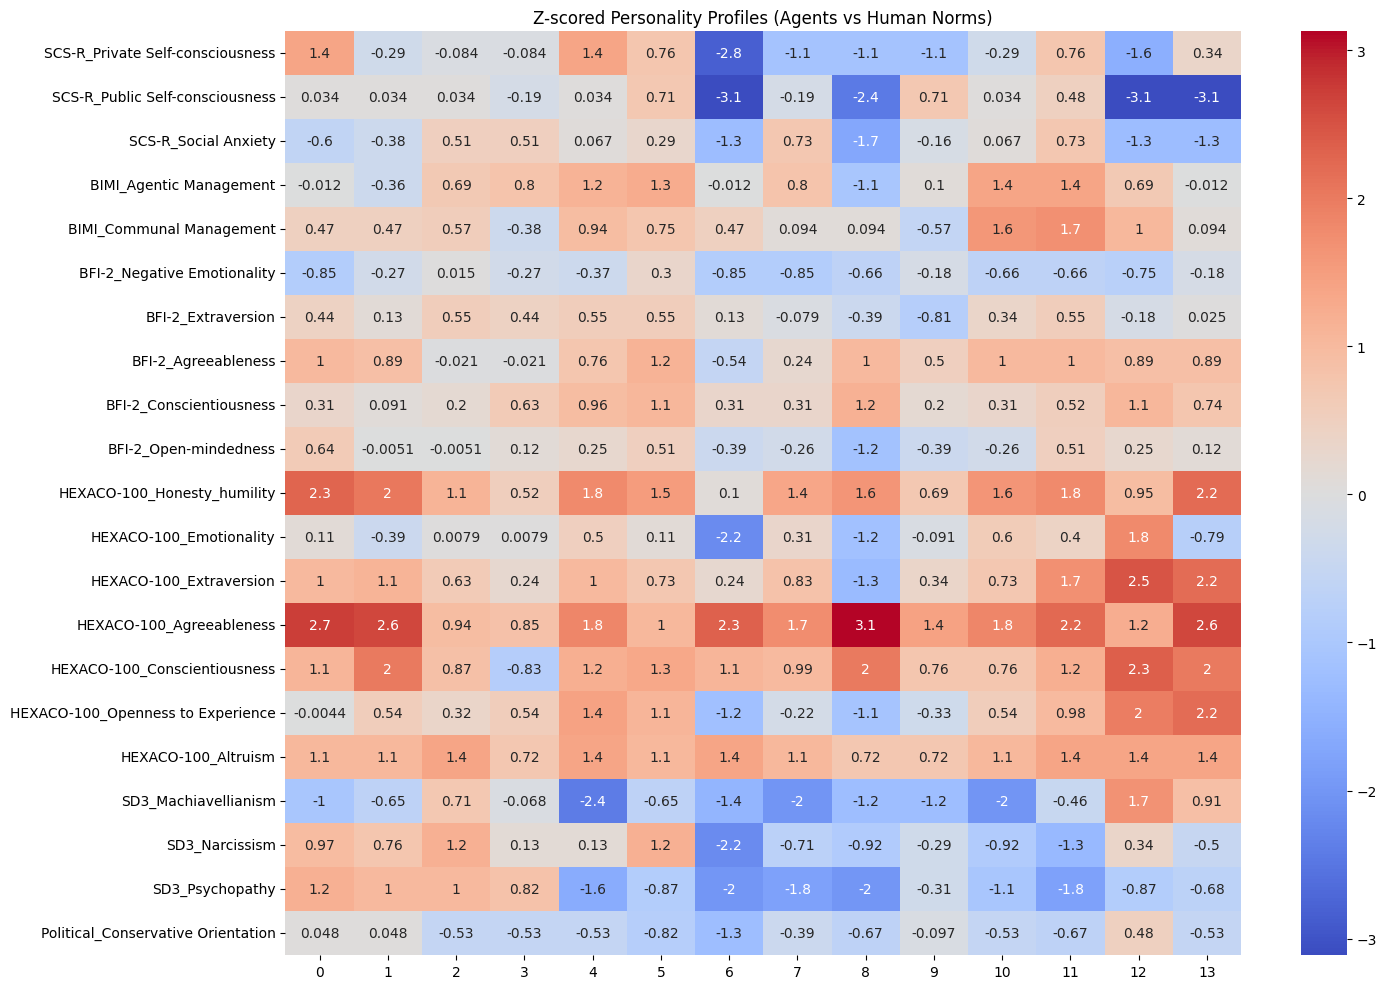

In [45]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(z_df.drop(['Lang_agent', 'Round'], axis=1).T, annot=True, cmap='coolwarm')
plt.title('Z-scored Personality Profiles (Agents vs Human Norms)')
plt.tight_layout()
plt.savefig(f'{output_dir}profile_heatmap.png')

# Code 5: Regression and Clustering for RQ2/H2

In [46]:
from statsmodels.formula.api import mixedlm
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [47]:
# Encode features (manual from table)
agent_features = {
    '<SQ0LruF>': {'params': 175, 'has_RLHF': 0, 'is_multimodal': 0},
    '<yLvzAov>': {'params': 175, 'has_RLHF': 0, 'is_multimodal': 0},
    '<aZVmWg7>': {'params': 1000, 'has_RLHF': 1, 'is_multimodal': 1},
    '<xWY2na4>': {'params': 1000, 'has_RLHF': 1, 'is_multimodal': 1},
    '<23R1qYZ>': {'params': 1000, 'has_RLHF': 1, 'is_multimodal': 1},
    '<bbK3vKO>': {'params': 70, 'has_RLHF': 0, 'is_multimodal': 0},
    '<2qYGe5m>': {'params': 46.7, 'has_RLHF': 1, 'is_multimodal': 0}
}

In [48]:
feat_df = pd.DataFrame(agent_features).T.reset_index().rename(columns={'index': 'Lang_agent'})

feat_df

,Lang_agent,params,has_RLHF,is_multimodal
0,<SQ0LruF>,175.0,0.0,0.0
1,<yLvzAov>,175.0,0.0,0.0
2,<aZVmWg7>,1000.0,1.0,1.0
3,<xWY2na4>,1000.0,1.0,1.0
4,<23R1qYZ>,1000.0,1.0,1.0
5,<bbK3vKO>,70.0,0.0,0.0
6,<2qYGe5m>,46.7,1.0,0.0


In [49]:
domain_df = domain_df.merge(feat_df, on='Lang_agent')
domain_df = domain_df.groupby('Lang_agent').mean(numeric_only=True).reset_index()

In [50]:
domain_df = domain_df.drop(['Round'], axis=1, errors='ignore')

In [51]:
domain_df

,Lang_agent,SCS-R_Private Self-consciousness,SCS-R_Public Self-consciousness,SCS-R_Social Anxiety,BIMI_Agentic Management,BIMI_Communal Management,BFI-2_Negative Emotionality,BFI-2_Extraversion,BFI-2_Agreeableness,BFI-2_Conscientiousness,...,HEXACO-100_Conscientiousness,HEXACO-100_Openness to Experience,HEXACO-100_Altruism,SD3_Machiavellianism,SD3_Narcissism,SD3_Psychopathy,Political_Conservative Orientation,params,has_RLHF,is_multimodal
0,<23R1qYZ>,11.0,10.0,4.5,3.00,3.25,2.708333,2.750000,4.166667,3.958333,...,4.28125,3.28125,4.500,2.444444,2.500000,1.500000,4.000000,1000.0,1.0,1.0
1,<2qYGe5m>,13.5,0.0,3.0,3.70,4.10,2.666667,3.166667,4.250000,4.125000,...,4.71875,4.87500,5.000,3.888889,2.777778,1.722222,4.833333,46.7,1.0,0.0
2,<SQ0LruF>,19.0,14.0,6.5,3.25,4.00,2.583333,3.458333,4.291667,3.583333,...,4.37500,3.84375,4.750,2.666667,3.277778,2.833333,5.000000,175.0,0.0,0.0
3,<aZVmWg7>,21.5,15.5,9.5,4.45,4.40,3.041667,3.666667,4.291667,4.208333,...,4.21875,4.40625,4.875,2.277778,3.166667,1.444444,3.333333,1000.0,1.0,1.0
4,<bbK3vKO>,17.5,15.0,10.5,4.60,5.25,2.500000,3.583333,4.333333,3.750000,...,4.06250,4.12500,4.875,2.444444,2.222222,1.333333,3.500000,70.0,0.0,0.0
5,<xWY2na4>,7.0,6.5,7.5,3.75,3.80,2.333333,3.250000,3.583333,3.666667,...,4.09375,3.28125,4.875,2.166667,2.055556,1.055556,3.000000,1000.0,1.0,1.0
6,<yLvzAov>,16.0,13.5,11.0,4.05,3.60,2.958333,3.625000,3.666667,3.750000,...,3.53125,3.93750,4.750,3.333333,3.166667,2.722222,3.666667,175.0,0.0,0.0


In [52]:
# Example regression: Predict has_RLHF from dark triad
model = mixedlm('has_RLHF ~ SD3_Machiavellianism + SD3_Narcissism + SD3_Psychopathy', domain_df, groups=domain_df['Lang_agent'])

In [53]:
model

In [54]:
print(model.fit().summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    has_RLHF
No. Observations:    7          Method:                REML    
No. Groups:          7          Scale:                 0.1039  
Min. group size:     1          Log-Likelihood:        -3.4296 
Max. group size:     1          Converged:             Yes     
Mean group size:     1.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            -0.098    1.351 -0.073 0.942 -2.747  2.551
SD3_Machiavellianism  0.210    0.307  0.682 0.495 -0.393  0.812
SD3_Narcissism        0.672    0.507  1.326 0.185 -0.321  1.665
SD3_Psychopathy      -0.969    0.300 -3.234 0.001 -1.556 -0.382
Group Var             0.104                                    



/opt/conda/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [55]:
domain_df

,Lang_agent,SCS-R_Private Self-consciousness,SCS-R_Public Self-consciousness,SCS-R_Social Anxiety,BIMI_Agentic Management,BIMI_Communal Management,BFI-2_Negative Emotionality,BFI-2_Extraversion,BFI-2_Agreeableness,BFI-2_Conscientiousness,...,HEXACO-100_Conscientiousness,HEXACO-100_Openness to Experience,HEXACO-100_Altruism,SD3_Machiavellianism,SD3_Narcissism,SD3_Psychopathy,Political_Conservative Orientation,params,has_RLHF,is_multimodal
0,<23R1qYZ>,11.0,10.0,4.5,3.00,3.25,2.708333,2.750000,4.166667,3.958333,...,4.28125,3.28125,4.500,2.444444,2.500000,1.500000,4.000000,1000.0,1.0,1.0
1,<2qYGe5m>,13.5,0.0,3.0,3.70,4.10,2.666667,3.166667,4.250000,4.125000,...,4.71875,4.87500,5.000,3.888889,2.777778,1.722222,4.833333,46.7,1.0,0.0
2,<SQ0LruF>,19.0,14.0,6.5,3.25,4.00,2.583333,3.458333,4.291667,3.583333,...,4.37500,3.84375,4.750,2.666667,3.277778,2.833333,5.000000,175.0,0.0,0.0
3,<aZVmWg7>,21.5,15.5,9.5,4.45,4.40,3.041667,3.666667,4.291667,4.208333,...,4.21875,4.40625,4.875,2.277778,3.166667,1.444444,3.333333,1000.0,1.0,1.0
4,<bbK3vKO>,17.5,15.0,10.5,4.60,5.25,2.500000,3.583333,4.333333,3.750000,...,4.06250,4.12500,4.875,2.444444,2.222222,1.333333,3.500000,70.0,0.0,0.0
5,<xWY2na4>,7.0,6.5,7.5,3.75,3.80,2.333333,3.250000,3.583333,3.666667,...,4.09375,3.28125,4.875,2.166667,2.055556,1.055556,3.000000,1000.0,1.0,1.0
6,<yLvzAov>,16.0,13.5,11.0,4.05,3.60,2.958333,3.625000,3.666667,3.750000,...,3.53125,3.93750,4.750,3.333333,3.166667,2.722222,3.666667,175.0,0.0,0.0


In [56]:
# Clustering
X = domain_df.drop(['Lang_agent', 'params', 'has_RLHF', 'is_multimodal'], axis=1, errors='ignore')

X

,SCS-R_Private Self-consciousness,SCS-R_Public Self-consciousness,SCS-R_Social Anxiety,BIMI_Agentic Management,BIMI_Communal Management,BFI-2_Negative Emotionality,BFI-2_Extraversion,BFI-2_Agreeableness,BFI-2_Conscientiousness,BFI-2_Open-mindedness,...,HEXACO-100_Emotionality,HEXACO-100_Extraversion,HEXACO-100_Agreeableness,HEXACO-100_Conscientiousness,HEXACO-100_Openness to Experience,HEXACO-100_Altruism,SD3_Machiavellianism,SD3_Narcissism,SD3_Psychopathy,Political_Conservative Orientation
0,11.0,10.0,4.5,3.00,3.25,2.708333,2.750000,4.166667,3.958333,3.416667,...,2.71875,2.90625,4.21875,4.28125,3.28125,4.500,2.444444,2.500000,1.500000,4.000000
1,13.5,0.0,3.0,3.70,4.10,2.666667,3.166667,4.250000,4.125000,4.041667,...,3.43750,4.71875,4.00000,4.71875,4.87500,5.000,3.888889,2.777778,1.722222,4.833333
2,19.0,14.0,6.5,3.25,4.00,2.583333,3.458333,4.291667,3.583333,4.125000,...,3.03125,3.90625,4.46875,4.37500,3.84375,4.750,2.666667,3.277778,2.833333,5.000000
3,21.5,15.5,9.5,4.45,4.40,3.041667,3.666667,4.291667,4.208333,4.166667,...,3.31250,3.78125,3.68750,4.21875,4.40625,4.875,2.277778,3.166667,1.444444,3.333333
4,17.5,15.0,10.5,4.60,5.25,2.500000,3.583333,4.333333,3.750000,4.000000,...,3.43750,4.00000,4.06250,4.06250,4.12500,4.875,2.444444,2.222222,1.333333,3.500000
5,7.0,6.5,7.5,3.75,3.80,2.333333,3.250000,3.583333,3.666667,3.708333,...,2.53125,3.56250,4.06250,4.09375,3.28125,4.875,2.166667,2.055556,1.055556,3.000000
6,16.0,13.5,11.0,4.05,3.60,2.958333,3.625000,3.666667,3.750000,3.958333,...,3.12500,3.50000,3.34375,3.53125,3.93750,4.750,3.333333,3.166667,2.722222,3.666667


In [57]:
linkage_matrix = linkage(X, method='ward')

linkage_matrix

array([[ 4.        ,  6.        ,  3.70132472,  2.        ],
       [ 2.        ,  3.        ,  5.08117626,  2.        ],
       [ 0.        ,  5.        ,  6.42276699,  2.        ],
       [ 7.        ,  8.        ,  6.62436627,  4.        ],
       [ 1.        ,  9.        , 12.05658212,  3.        ],
       [10.        , 11.        , 23.89116732,  7.        ]])

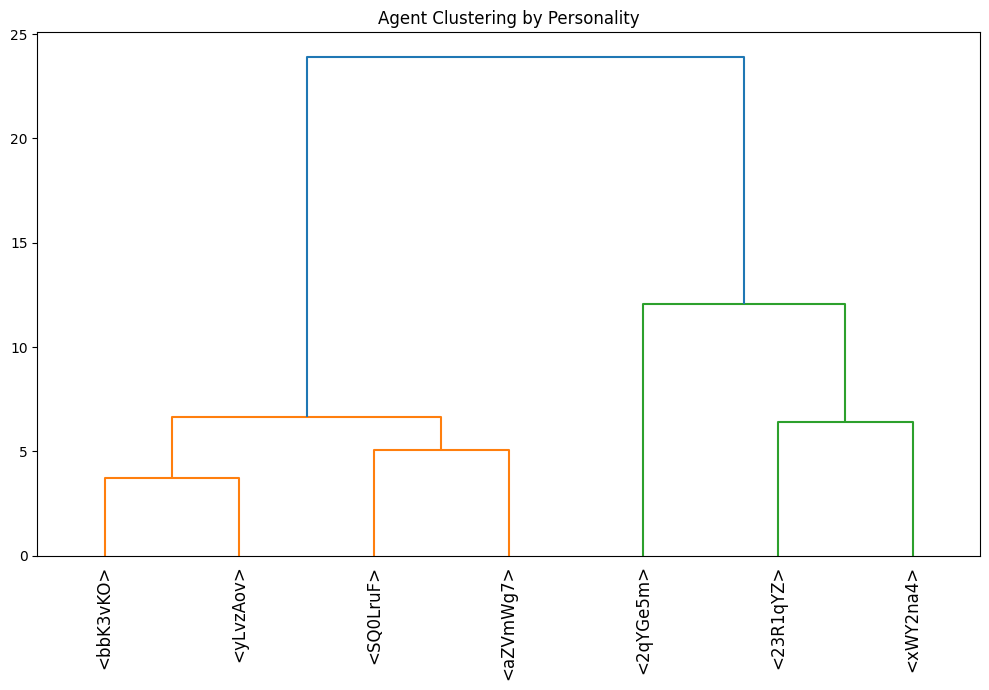

In [58]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=domain_df['Lang_agent'].values)

plt.title('Agent Clustering by Personality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f'{output_dir}dendrogram.png')

In [59]:
clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
domain_df['Cluster'] = clust.fit_predict(X)
print(domain_df[['Lang_agent', 'Cluster', 'has_RLHF']])

  Lang_agent  Cluster  has_RLHF
0  <23R1qYZ>        1       1.0
1  <2qYGe5m>        2       1.0
2  <SQ0LruF>        0       0.0
3  <aZVmWg7>        0       1.0
4  <bbK3vKO>        0       0.0
5  <xWY2na4>        1       1.0
6  <yLvzAov>        0       0.0


# Code 6: Personality-Architecture Embedding (PAE) Model

In [60]:
import umap
from sentence_transformers import SentenceTransformer
import torch
import torch.nn as nn
from torch.optim import Adam
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
import shap

from tqdm import tqdm, trange

In [61]:
# Text descriptions (from table, concatenated)
agent_texts = {
    '<SQ0LruF>': '~175B parameters, 96 layers, 12288 dim, Decoder-only transformer, attention mechanism, zero/few-shot learning, Broad web, books, filtered internet corpus; uncurated (prone to bias), Few-shot prompting; no human-in-the-loop tuning at release, Minimal built-in alignment; no RLHF originally',
    '<yLvzAov>': '~175B parameters, 96 layers, 12288 dim, Same as above: decoder-only, but optimized for chat, 16k token context window, Same as above, perhaps extended; more pre-filtered, Instruction-tuned chat model; improved format handling, some encoding bug fixes, Basic moderation via updated moderation model; improved chat safety',
    '<aZVmWg7>': '~1T parameters, many but unknown layers, large but unknown dim, Multimodal: text, vision, audio; supports voice, image; 128k token context, Mixed web/internet plus licensed datasets, image/audio corpora, Corporate fine-tuning option via proprietary data; also RLHF/alignment strategies, Internal adversarial testing, RLHF, alignment classifiers; corporate fine-tuning controls',
    '<xWY2na4>': '~1T parameters, many but unknown layers, large but unknown dim, Multimodal (text/image), decoder-only, 32k token context, More curated high-quality web and licensed sources; filtered for bias and safety, RLHF alignment; human-in-loop red-team adversarial testing; rule-based reward model classifier, Strong guardrails: refusal to harmful prompts, classification-based safety tuning',
    '<23R1qYZ>': '~1T parameters, many but unknown layers, large but unknown dim, Multimodal (text, image, code); Features with more latency/data capabilities, Trained on web, code, image data; proprietary datasets (quality-filtered), Instruction-tuned and RLHF-based alignment; internal safe completion tuning, Safety-focused, enterprise-grade guardrails',
    '<bbK3vKO>': '~70B parameters, 80 layers, 8192 dim, Open-source multilingual chat model; long-context (32k), Public datasets and web; multilingual data; license-permissive, Instruction-tuned chat variant; community moderation tools optional, No built-in safety classification; relying on user-deployed guardrails',
    '<2qYGe5m>': '~46.7B parameters, 32 layers, 4096 dim, Sparse Mixture-of-Experts: 8 FF experts per layer, router selects 2; decoder-only with 32k context, Pre-trained on open web multilingual content, code, and general corpora, Instruction-tuned Instruct variant with RLHF; fine-tuned to follow prompts, No built-in guardrails—open-source, depends on external moderation or wrappers'
}

In [62]:
# Assume full dict filled similarly
# Embed texts
text_embedder = SentenceTransformer('all-MiniLM-L6-v2')
text_embs = {agent: text_embedder.encode(text) for agent, text in agent_texts.items()}
text_df = pd.DataFrame(text_embs).T.reset_index().rename(columns={'index': 'Lang_agent'})

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [63]:
text_df

,Lang_agent,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,<SQ0LruF>,-0.002291,-0.117436,-0.088955,-0.036059,-0.009157,0.030621,-0.021852,0.031544,-0.020787,...,0.001843,0.061814,0.028577,-0.045029,0.016949,0.071540,0.048210,0.053635,-0.053774,0.037136
1,<yLvzAov>,0.001759,-0.055123,-0.037850,-0.011348,-0.056365,0.024352,0.007282,0.047159,-0.023463,...,-0.000105,0.037344,0.015382,0.002222,0.060263,0.016400,0.041957,0.080246,-0.075051,0.032907
2,<aZVmWg7>,-0.053563,-0.109839,-0.048140,-0.063266,-0.005766,0.012173,-0.009365,0.013626,-0.075247,...,-0.000227,0.029507,0.018745,-0.008157,0.019773,0.049240,0.034572,-0.003855,-0.035902,0.030137
3,<xWY2na4>,-0.090949,-0.062967,-0.072237,-0.014247,0.110489,-0.009661,0.004154,-0.011906,-0.022112,...,0.011554,0.017650,0.017422,-0.039360,0.021563,0.059474,0.109039,0.015502,-0.022003,0.011113
4,<23R1qYZ>,-0.047353,-0.044300,-0.008513,-0.046582,0.013963,-0.027105,0.021689,0.074304,-0.070129,...,0.029750,0.050072,0.032364,-0.059214,0.034976,0.058671,0.019226,-0.019728,0.015486,0.034180
5,<bbK3vKO>,0.017496,-0.046515,-0.025982,0.002453,-0.012786,-0.001695,0.044478,0.012285,-0.035239,...,0.019013,0.060676,0.016032,0.029478,0.073883,0.050937,0.046591,0.056750,-0.058514,0.007189
6,<2qYGe5m>,0.003611,-0.111231,-0.053894,0.016853,0.013800,0.014552,-0.051108,0.039253,-0.055584,...,0.029072,0.058345,-0.029088,-0.084251,-0.023810,0.012377,0.008235,0.037237,-0.016864,0.036486


In [64]:
# Personality embeddings via UMAP
personality_X = domain_df.drop(['Lang_agent', 'params', 'has_RLHF', 'is_multimodal', 'Cluster'], axis=1, errors='ignore')

personality_X

,SCS-R_Private Self-consciousness,SCS-R_Public Self-consciousness,SCS-R_Social Anxiety,BIMI_Agentic Management,BIMI_Communal Management,BFI-2_Negative Emotionality,BFI-2_Extraversion,BFI-2_Agreeableness,BFI-2_Conscientiousness,BFI-2_Open-mindedness,...,HEXACO-100_Emotionality,HEXACO-100_Extraversion,HEXACO-100_Agreeableness,HEXACO-100_Conscientiousness,HEXACO-100_Openness to Experience,HEXACO-100_Altruism,SD3_Machiavellianism,SD3_Narcissism,SD3_Psychopathy,Political_Conservative Orientation
0,11.0,10.0,4.5,3.00,3.25,2.708333,2.750000,4.166667,3.958333,3.416667,...,2.71875,2.90625,4.21875,4.28125,3.28125,4.500,2.444444,2.500000,1.500000,4.000000
1,13.5,0.0,3.0,3.70,4.10,2.666667,3.166667,4.250000,4.125000,4.041667,...,3.43750,4.71875,4.00000,4.71875,4.87500,5.000,3.888889,2.777778,1.722222,4.833333
2,19.0,14.0,6.5,3.25,4.00,2.583333,3.458333,4.291667,3.583333,4.125000,...,3.03125,3.90625,4.46875,4.37500,3.84375,4.750,2.666667,3.277778,2.833333,5.000000
3,21.5,15.5,9.5,4.45,4.40,3.041667,3.666667,4.291667,4.208333,4.166667,...,3.31250,3.78125,3.68750,4.21875,4.40625,4.875,2.277778,3.166667,1.444444,3.333333
4,17.5,15.0,10.5,4.60,5.25,2.500000,3.583333,4.333333,3.750000,4.000000,...,3.43750,4.00000,4.06250,4.06250,4.12500,4.875,2.444444,2.222222,1.333333,3.500000
5,7.0,6.5,7.5,3.75,3.80,2.333333,3.250000,3.583333,3.666667,3.708333,...,2.53125,3.56250,4.06250,4.09375,3.28125,4.875,2.166667,2.055556,1.055556,3.000000
6,16.0,13.5,11.0,4.05,3.60,2.958333,3.625000,3.666667,3.750000,3.958333,...,3.12500,3.50000,3.34375,3.53125,3.93750,4.750,3.333333,3.166667,2.722222,3.666667


In [65]:
umap_reducer = umap.UMAP(n_components=5, random_state=42)  # Reduced to 5 < 7 samples

In [66]:
pers_embs = umap_reducer.fit_transform(personality_X)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/conda/lib/python3.10/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [67]:
pers_df = pd.DataFrame(pers_embs, index=domain_df['Lang_agent']).reset_index()

pers_df

,Lang_agent,0,1,2,3,4
0,<23R1qYZ>,0.008703,11.864519,7.165442,16.398968,7.427019
1,<2qYGe5m>,0.550603,12.128382,7.551259,16.101736,7.178873
2,<SQ0LruF>,-0.491501,12.986611,7.050277,16.005899,7.351772
3,<aZVmWg7>,-0.747220,13.193832,6.503553,16.409605,7.771510
4,<bbK3vKO>,-0.784345,12.581305,6.227338,16.005737,7.356245
5,<xWY2na4>,0.655097,12.069421,7.173765,16.266205,7.843162
6,<yLvzAov>,-0.715395,12.502995,6.617502,16.879208,7.179943


In [68]:
# Concat
pae_df = pers_df.merge(text_df, on='Lang_agent').merge(domain_df[['Lang_agent', 'has_RLHF']], on='Lang_agent')

pae_df

,Lang_agent,0_x,1_x,2_x,3_x,4_x,0_y,1_y,2_y,3_y,...,375,376,377,378,379,380,381,382,383,has_RLHF
0,<23R1qYZ>,0.008703,11.864519,7.165442,16.398968,7.427019,-0.047353,-0.044300,-0.008513,-0.046582,...,0.050072,0.032364,-0.059214,0.034976,0.058671,0.019226,-0.019728,0.015486,0.034180,1.0
1,<2qYGe5m>,0.550603,12.128382,7.551259,16.101736,7.178873,0.003611,-0.111231,-0.053894,0.016853,...,0.058345,-0.029088,-0.084251,-0.023810,0.012377,0.008235,0.037237,-0.016864,0.036486,1.0
2,<SQ0LruF>,-0.491501,12.986611,7.050277,16.005899,7.351772,-0.002291,-0.117436,-0.088955,-0.036059,...,0.061814,0.028577,-0.045029,0.016949,0.071540,0.048210,0.053635,-0.053774,0.037136,0.0
3,<aZVmWg7>,-0.747220,13.193832,6.503553,16.409605,7.771510,-0.053563,-0.109839,-0.048140,-0.063266,...,0.029507,0.018745,-0.008157,0.019773,0.049240,0.034572,-0.003855,-0.035902,0.030137,1.0
4,<bbK3vKO>,-0.784345,12.581305,6.227338,16.005737,7.356245,0.017496,-0.046515,-0.025982,0.002453,...,0.060676,0.016032,0.029478,0.073883,0.050937,0.046591,0.056750,-0.058514,0.007189,0.0
5,<xWY2na4>,0.655097,12.069421,7.173765,16.266205,7.843162,-0.090949,-0.062967,-0.072237,-0.014247,...,0.017650,0.017422,-0.039360,0.021563,0.059474,0.109039,0.015502,-0.022003,0.011113,1.0
6,<yLvzAov>,-0.715395,12.502995,6.617502,16.879208,7.179943,0.001759,-0.055123,-0.037850,-0.011348,...,0.037344,0.015382,0.002222,0.060263,0.016400,0.041957,0.080246,-0.075051,0.032907,0.0


In [69]:
X_pae = pae_df.drop(['Lang_agent', 'has_RLHF'], axis=1).values
y_pae = pae_df['has_RLHF'].values

In [70]:
X_pae

array([[ 8.70317500e-03,  1.18645191e+01,  7.16544199e+00, ...,
        -1.97282620e-02,  1.54863279e-02,  3.41799706e-02],
       [ 5.50603092e-01,  1.21283817e+01,  7.55125904e+00, ...,
         3.72373387e-02, -1.68643724e-02,  3.64864655e-02],
       [-4.91501391e-01,  1.29866114e+01,  7.05027723e+00, ...,
         5.36353067e-02, -5.37740551e-02,  3.71364541e-02],
       ...,
       [-7.84344673e-01,  1.25813046e+01,  6.22733831e+00, ...,
         5.67496866e-02, -5.85139655e-02,  7.18853949e-03],
       [ 6.55096531e-01,  1.20694208e+01,  7.17376518e+00, ...,
         1.55024454e-02, -2.20026448e-02,  1.11134304e-02],
       [-7.15394735e-01,  1.25029955e+01,  6.61750174e+00, ...,
         8.02462772e-02, -7.50514194e-02,  3.29072960e-02]], dtype=float32)

In [71]:
y_pae

array([1., 1., 0., 1., 0., 1., 0.])

In [72]:
# MLP Classifier
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.sigmoid(self.fc3(x))

In [73]:
# Train/Eval with LOO CV
loo = LeaveOneOut()
preds, trues = [], []
for train_idx, test_idx in loo.split(X_pae):
    X_train, X_test = X_pae[train_idx], X_pae[test_idx]
    y_train, y_test = y_pae[train_idx], y_pae[test_idx]
    
    model = MLP(X_pae.shape[1])
    opt = Adam(model.parameters(), lr=0.01)
    loss_fn = nn.BCELoss()
    
    for epoch in trange(100):
        model.train()
        out = model(torch.tensor(X_train).float())
        loss = loss_fn(out.squeeze(), torch.tensor(y_train).float())
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    model.eval()
    pred = (model(torch.tensor(X_test).float()).squeeze() > 0.5).int().item()
    preds.append(pred)
    trues.append(y_test[0])

100%|██████████| 100/100 [00:00<00:00, 110.41it/s]


In [74]:
acc = accuracy_score(trues, preds)
f1 = f1_score(trues, preds)
print(f'PAE Accuracy: {acc}, F1: {f1}')

PAE Accuracy: 0.7142857142857143, F1: 0.75


In [75]:
# SHAP for interpretability (on full model)
# Retrain on all for SHAP
full_model = MLP(X_pae.shape[1])
opt = Adam(full_model.parameters(), lr=0.01)
for epoch in trange(100):
    full_model.train()
    out = full_model(torch.tensor(X_pae).float())
    loss = loss_fn(out.squeeze(), torch.tensor(y_pae).float())
    opt.zero_grad()
    loss.backward()
    opt.step()

100%|██████████| 100/100 [00:01<00:00, 84.13it/s]


In [76]:
explainer = shap.DeepExplainer(full_model, torch.tensor(X_pae).float())
shap_values = explainer.shap_values(torch.tensor(X_pae).float(), check_additivity=False)

In [77]:
shap_values

array([[[ 3.87504809e-02],
        [ 8.10762960e-03],
        [ 5.42130973e-03],
        ...,
        [ 4.48613707e-03],
        [ 4.29684808e-03],
        [-1.60653744e-05]],

       [[ 7.49650970e-02],
        [ 5.89713361e-03],
        [ 1.03910612e-02],
        ...,
        [ 1.50643266e-03],
        [ 2.66173296e-03],
        [-2.08464735e-05]],

       [[-5.07686101e-02],
        [-8.83097295e-03],
        [-5.82530280e-04],
        ...,
        [-3.75906751e-03],
        [-3.19455634e-03],
        [-1.45760732e-05]],

       ...,

       [[-7.18770474e-02],
        [-3.02565773e-03],
        [-1.42998891e-02],
        ...,
        [-3.73214250e-03],
        [-3.34316329e-03],
        [ 3.48444555e-05]],

       [[ 6.65075332e-02],
        [ 5.29538048e-03],
        [ 4.77736583e-03],
        ...,
        [ 2.23882124e-03],
        [ 1.92630233e-03],
        [ 1.76917729e-05]],

       [[-6.94373399e-02],
        [-2.09787535e-03],
        [-8.18113517e-03],
        ...,
        

In [78]:
shap_values.shape

(7, 389, 1)

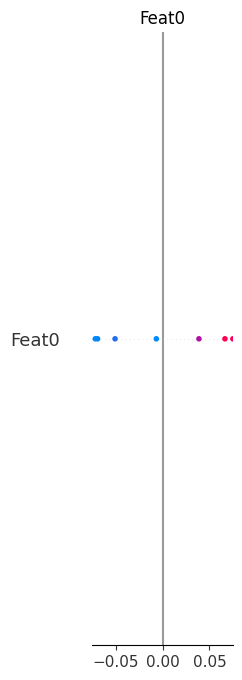

In [79]:
shap.summary_plot(shap_values, X_pae, feature_names=[f'Feat{i}' for i in range(X_pae.shape[1])], show=False)
plt.savefig(
    f'{output_dir}shap_plot.png',
    bbox_inches='tight'
)
plt.show()